实现R语言排序与计数模型。

# 排序模型

In [25]:
# 导入数据集
library(haven)
panel84extract <- read_dta("stata_data/panel84extract.dta")
panel84extract |> 
  glimpse()

Rows: 98
Columns: 38
$ s77       <dbl> 420042, 2112845, 17519000, 368584, 28188, 280440, 488647, 15…
$ s78       <dbl> 494414, 2331470, 19654000, 395675, 48432, 300807, 568606, 17…
$ s79       <dbl> 591930, 2542105, 22461000, 471539, 103004, 343180, 663348, 1…
$ s80       <dbl> 695580, 2970960, 24959000, 509057, 191086, 348491, 721200, 2…
$ s81       <dbl> 702212, 3377564, 27240000, 606870, 270706, 362873, 832721, 2…
$ s82       <dbl> 595830, 2774725, 26500000, 603437, 328185, 315275, 735344, 2…
$ s83       <dbl> 619179, 2274075, 26797000, 533102, 400032, 352437, 746984, 2…
$ b77       <dbl> 0.95, 0.90, 1.10, 1.20, 2.00, 1.10, 0.80, 1.00, 1.20, 1.05, …
$ b78       <dbl> 1.00, 0.90, 1.10, 1.20, 2.00, 1.10, 0.80, 1.00, 1.25, 1.10, …
$ b79       <dbl> 0.95, 0.95, 1.10, 1.15, 2.00, 1.00, 0.85, 1.00, 1.25, 1.10, …
$ b80       <dbl> 1.00, 0.90, 1.10, 1.15, 2.00, 1.05, 0.95, 0.95, 1.15, 0.95, …
$ b81       <dbl> 1.00, 0.95, 1.00, 1.05, 1.70, 0.80, 1.00, 0.85, 1.05, 0.90, …
$ b82       <dbl> 1

In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [23]:
panel84extract |> 
  distinct(rating83c)

# A tibble: 4 × 1
  rating83c 
  <dbl+lbl> 
1 2 [BA_B_C]
2 3 [BAA]   
3 4 [AA_A]  
4 5 [AAA]   

In [27]:
# 因变量转化为有序因子
panel84extract <- panel84extract |> 
  mutate(
    rating83c = ordered(rating83c, levels = c(2, 3, 4 ,5))
  )

In [28]:
library(MASS)

fit_oprobit <- polr(
  rating83c ~ ia83 + dia,
  data = panel84extract,
  method = "probit"
)

summary(fit_oprobit)


Re-fitting to get Hessian



Call:
polr(formula = rating83c ~ ia83 + dia, data = panel84extract, 
    method = "probit")

Coefficients:
        Value Std. Error t value
ia83  0.05125    0.01673   3.064
dia  -0.04961    0.02544  -1.950

Intercepts:
    Value   Std. Error t value
2|3 -0.1877  0.2048    -0.9165
3|4  0.6345  0.2157     2.9415
4|5  1.0645  0.2232     4.7696

Residual Deviance: 255.7551 
AIC: 265.7551 

In [ ]:
# 输出置信区间
confint(fit_oprobit)

Waiting for profiling to be done...

Re-fitting to get Hessian



           2.5 %       97.5 %
ia83  0.01865660 0.0842657673
dia  -0.09964345 0.0001242498

In [35]:
# 输出预测值
predict(fit_oprobit, type = "p")

            2         3          4          5
1  0.25308014 0.3094463 0.15901938 0.27845416
2  0.30384972 0.3174310 0.14873791 0.22998139
3  0.18029263 0.2830388 0.16899367 0.36767489
4  0.20225825 0.2932035 0.16681547 0.33772277
5  0.12352282 0.2451581 0.16904771 0.46227134
6  0.30597296 0.3176115 0.14827080 0.22814478
7  0.21056564 0.2965136 0.16577487 0.32714584
8  0.14009186 0.2582272 0.17010432 0.43157666
9  0.30785109 0.3177616 0.14785559 0.22653175
10 0.08534926 0.2065803 0.16122532 0.54684515
11 0.26101181 0.3111878 0.15754442 0.27025596
12 0.31962162 0.3185025 0.14521239 0.21666352
13 0.13595659 0.2551403 0.16994084 0.43896223
14 0.33022512 0.3188833 0.14277582 0.20811573
15 0.32209485 0.3186152 0.14464852 0.21464145
16 0.40543154 0.3145859 0.12444180 0.15554071
17 0.11758378 0.2399921 0.16838334 0.47404082
18 0.38815926 0.3165820 0.12877359 0.16648514
19 0.28625501 0.3154827 0.15250743 0.24575488
20 0.45067112 0.3068154 0.11291734 0.12959613
21 0.20731736 0.2952524 0.16619452

In [37]:
library(MASS)

fit_oprobit <- polr(
  rating83c ~ ia83 + dia,
  data = panel84extract,
  method = "logistic"
)

summary(fit_oprobit)


Re-fitting to get Hessian



Call:
polr(formula = rating83c ~ ia83 + dia, data = panel84extract, 
    method = "logistic")

Coefficients:
        Value Std. Error t value
ia83  0.09392    0.02962   3.171
dia  -0.08669    0.04498  -1.927

Intercepts:
    Value   Std. Error t value
2|3 -0.1853  0.3571    -0.5188
3|4  1.1857  0.3882     3.0544
4|5  1.9084  0.4165     4.5822

Residual Deviance: 254.5429 
AIC: 264.5429 

# 泊松回归

In [38]:
# 导入数据集
library(haven)
CRIME1 <- read_dta("stata_data/CRIME1.DTA")
CRIME1

# A tibble: 2,725 × 16
   narr86 nfarr86 nparr86  pcnv avgsen tottime ptime86 qemp86  inc86 durat black
    <dbl>   <dbl>   <dbl> <dbl>  <dbl>   <dbl>   <dbl>  <dbl>  <dbl> <dbl> <dbl>
 1      0       0       0 0.380   17.6    35.2      12      0  0       0       0
 2      2       2       0 0.440    0       0         0      1  0.800   0       0
 3      1       1       0 0.330   22.8    22.8       0      0  0      11       1
 4      2       2       1 0.25     0       0         5      2  8.80    0       0
 5      1       1       0 0        0       0         0      2  8.10    1       0
 6      0       0       0 1        0       0         0      4 97.6     0       0
 7      2       2       1 0.440    0       0         0      0  0       1       1
 8      5       3       5 0.75     0       0         0      0  0       3       0
 9      0       0       0 0.330   10.9    21.8       9      0  0      19.3     1
10      0       0       0 0.230    0       0         0      3 16.7     0       0
# ℹ 2

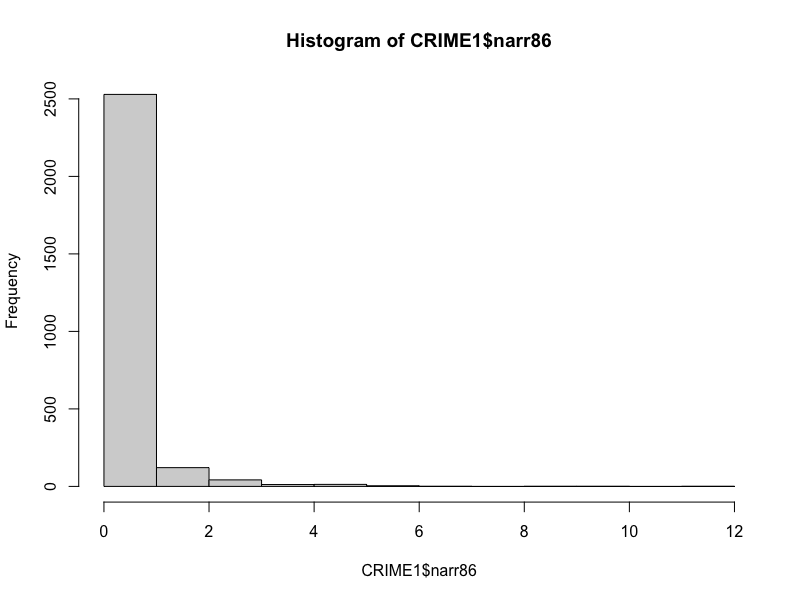

In [39]:
hist(CRIME1$narr86)

In [42]:
# 进行泊松回归
fit_possion <- glm(
  narr86 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + inc86 + black + hispan + born60,
  data = CRIME1,
  family = poisson(link = "log")
)

summary(fit_possion)


Call:
glm(formula = narr86 ~ pcnv + avgsen + tottime + ptime86 + qemp86 + 
    inc86 + black + hispan + born60, family = poisson(link = "log"), 
    data = CRIME1)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.599589   0.067250  -8.916  < 2e-16 ***
pcnv        -0.401571   0.084971  -4.726 2.29e-06 ***
avgsen      -0.023772   0.019946  -1.192   0.2333    
tottime      0.024490   0.014750   1.660   0.0969 .  
ptime86     -0.098558   0.020695  -4.763 1.91e-06 ***
qemp86      -0.038019   0.029024  -1.310   0.1902    
inc86       -0.008081   0.001041  -7.762 8.34e-15 ***
black        0.660838   0.073834   8.950  < 2e-16 ***
hispan       0.499813   0.073927   6.761 1.37e-11 ***
born60      -0.051029   0.064052  -0.797   0.4256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3208.5  on 2724  degrees of freedom
Residual deviance: 2822.2  on 2715  degrees of

In [46]:
# 使用稳健标准误
library(sandwich)
robust_se <- vcovHC(fit_possion, type = "HC1")

library(lmtest)
coeftest(fit_possion, robust_se)


z test of coefficients:

              Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -0.5995888  0.0894943 -6.6997 2.088e-11 ***
pcnv        -0.4015713  0.1013294 -3.9630 7.401e-05 ***
avgsen      -0.0237723  0.0236469 -1.0053    0.3148    
tottime      0.0244904  0.0205362  1.1925    0.2330    
ptime86     -0.0985584  0.0223404 -4.4117 1.026e-05 ***
qemp86      -0.0380187  0.0342074 -1.1114    0.2664    
inc86       -0.0080807  0.0012296 -6.5717 4.975e-11 ***
black        0.6608376  0.0996219  6.6335 3.279e-11 ***
hispan       0.4998133  0.0925404  5.4010 6.626e-08 ***
born60      -0.0510286  0.0812747 -0.6279    0.5301    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
